In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
vol= np.array([2.4,1,0.21])

In [3]:
N=10000
m=220
n=38

In [4]:
molefrac= np.zeros((m+1,3))
p = np.zeros((m,3))
total_molecules= np.zeros((m+1,3))

In [5]:
molefrac[0]= np.array([0.85,0.12,0.03])
total_molecules[0]= N*molefrac[0]

In [6]:
for step in range(1, m + 1):
  for _ in range(n):
    for a in range(3):
      p[step-1, a] = vol[a] * total_molecules[step-1, a]
    maxp = np.max(p[step - 1])
    r = p[step - 1] / maxp
    randno = np.random.rand()
    total_molecules[step - 1] = np.where(r > randno, total_molecules[step - 1] - 1, total_molecules[step - 1])
  total_molecules[step] = total_molecules[step - 1]
  total_sum = np.sum(total_molecules[step])
  molefrac[step] = total_molecules[step] / total_sum

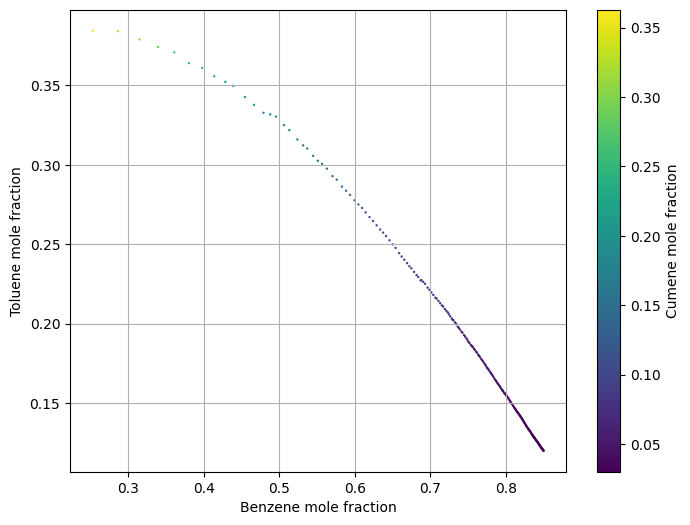

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(molefrac[:, 0], molefrac[:, 1], c=molefrac[:, 2], cmap='viridis',s=0.5)
plt.colorbar(label='Cumene mole fraction')
plt.xlabel('Benzene mole fraction')
plt.ylabel('Toluene mole fraction')
plt.grid(True)
plt.show()

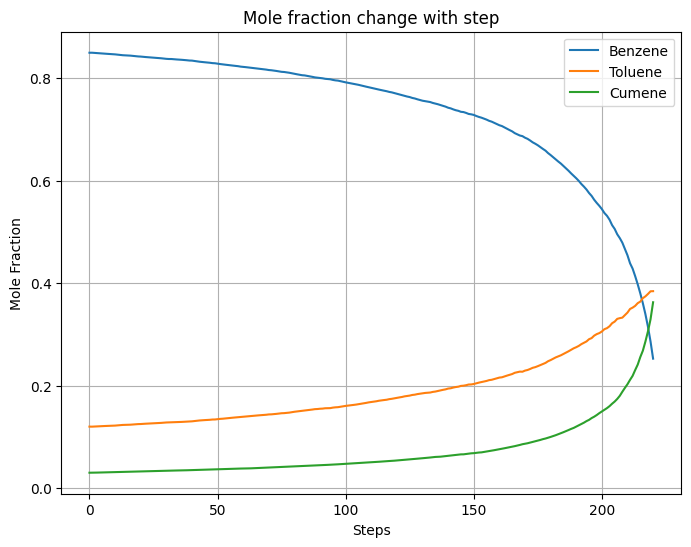

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(range(m+1), molefrac[:, 0], label='Benzene')
plt.plot(range(m+1), molefrac[:, 1], label='Toluene')
plt.plot(range(m+1), molefrac[:, 2], label='Cumene')
plt.xlabel('Steps')
plt.ylabel('Mole Fraction')
plt.title('Mole fraction change with step')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
!pip install matplotlib python-ternary
import ternary

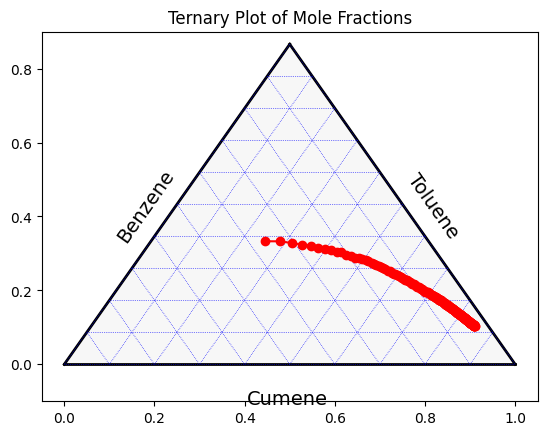

In [11]:
# Plot the ternary diagram
fig, tax = ternary.figure(scale=1.0)
tax.boundary(linewidth=2.0)
tax.gridlines(color="blue", multiple=0.1)
fontsize = 14
tax.left_axis_label("Benzene", fontsize=fontsize)
tax.right_axis_label("Toluene", fontsize=fontsize)
tax.bottom_axis_label("Cumene", fontsize=fontsize)
points = molefrac.tolist()
tax.plot(points, marker='o', linestyle='-', color='red')
plt.title("Ternary Plot of Mole Fractions")
tax.show()